In [1]:
import pandas as pd

df = pd.read_csv('laptops_amazon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                97 non-null     int64 
 1   Brand                     97 non-null     object
 2   Model Name                97 non-null     object
 3   Screen Size               97 non-null     object
 4   RAM                       88 non-null     object
 5   Storage                   97 non-null     object
 6   CPU                       96 non-null     object
 7   Operating System          97 non-null     object
 8   Price                     97 non-null     object
 9   Rating                    97 non-null     object
 10  Review Count              97 non-null     object
 11  Graphic Card Description  97 non-null     object
dtypes: int64(1), object(11)
memory usage: 9.2+ KB


In [2]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Brand                     97 non-null     object
 1   Model Name                97 non-null     object
 2   Screen Size               97 non-null     object
 3   RAM                       88 non-null     object
 4   Storage                   97 non-null     object
 5   CPU                       96 non-null     object
 6   Operating System          97 non-null     object
 7   Price                     97 non-null     object
 8   Rating                    97 non-null     object
 9   Review Count              97 non-null     object
 10  Graphic Card Description  97 non-null     object
dtypes: object(11)
memory usage: 8.5+ KB


In [3]:
def clear_ram(x):
    x = str(x).strip()
    if x == "No RAM":
        return 0
    elif 'GB' in x:
        result = x.replace('GB', '').replace('Gb', '').strip()
        return int(result)
    else:
        return 0


df['RAM'] = df['RAM'].apply(clear_ram)

In [6]:
def clear_graphic(x):
    x = str(x).strip()
    if x == 'No graphic card description':
        return 0
    elif x == 'Integrated':
        return 1
    else:
        return 2


df['Graphic Card Description'] = df['Graphic Card Description'].apply(clear_graphic)

In [7]:
def clean_review(x):
    x = str(x).strip()
    if x == 'No review count':
        return 0
    x = x.replace('ratings', '').replace(',', '').strip()
    try:
        return int(x)
    except:
        return 0

df['Review Count'] = df['Review Count'].apply(clean_review)

In [8]:
def clear_rating(x):
    x = str(x).strip()
    if x == "No rating":
        return 0
    try:
        return float(x)
    except:
        return 0


df['Rating'] = df['Rating'].apply(clear_rating)


In [9]:

df['CPU'] = df['CPU'].fillna('Ryzen 3')

In [10]:
def clear_price(x):
    x = str(x).strip()
    if x == "No price":
        return 0
    x = x.replace(',', '').strip()
    try:
        return int(x)
    except:
        return 0


df['Price'] = df['Price'].apply(clear_price)

In [11]:
def clear_os(x):
    x = str(x).strip()
    if x == "No operating system":
        return 0
    elif 'Window 11' in x:
        return 11
    elif 'Windows' in x:
        return 10
    elif 'macOS' in x:
        return 2
    else:
        return 1


df['Operating System'] = df['Operating System'].apply(clear_os)

In [12]:
def clear_cpu(x):
    x = str(x).strip()
    if x == "No CPU":
        return 0
    elif 'i3' in x or 'Ryzen 3' in x:
        return 3
    elif 'i5' in x or 'Ryzen 5' in x or 'Ultra 5' in x:
        return 5
    elif 'i7' in x or 'Ryzen 7' in x:
        return 7
    elif 'i9' in x or 'Ryzen 9' in x:
        return 9
    else:
        return 1


df['CPU'] = df['CPU'].apply(clear_cpu)

In [13]:
def clear_storage(x):
    if pd.isnull(x):
        return 0
    if isinstance(x, (int, float)):
        return int(x)

    x = str(x).strip()

    if x == 'No storage':
        return 0
    elif 'TB' in x:
        result = x.replace('TB', '').replace('Tb', '').strip()
        return int(float(result) * 1024)
    elif 'GB' in x or 'Gb' in x:
        result = x.replace('GB', '').replace('Gb', '').strip()
        return int(float(result))
    else:

        try:
            return int(float(x))
        except ValueError:
            return 0

df['Storage'] = df['Storage'].apply(clear_storage)

In [15]:
def clear_screen(x):
    if pd.isnull(x):
        return 0
    if isinstance(x, (int, float)):
        return round(float(x), 2)
    x = str(x).strip()

    if 'Centimetres' in x or 'Centimeters' in x:
        result = float(x.replace('Centimetres', '').replace('Centimeters', '').strip())
        result = result / 2.54  # convert to inches
        return round(result, 2)
    elif 'Inches' in x:
        result = float(x.replace('Inches', '').strip())
        return round(result, 2)
    else:

        try:
            result = float(x)
            return round(result, 2)
        except ValueError:

          return 0

df['Screen Size'] = df['Screen Size'].apply(clear_screen)

In [17]:
df.info()
df.to_csv("cleaned_data.csv", index=False)

print("Cleaned CSV file saved")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     97 non-null     object 
 1   Model Name                97 non-null     object 
 2   Screen Size               97 non-null     float64
 3   RAM                       97 non-null     int64  
 4   Storage                   97 non-null     int64  
 5   CPU                       97 non-null     int64  
 6   Operating System          97 non-null     int64  
 7   Price                     97 non-null     int64  
 8   Rating                    97 non-null     float64
 9   Review Count              97 non-null     int64  
 10  Graphic Card Description  97 non-null     int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 8.5+ KB
Cleaned CSV file saved


In [18]:
#Hypotizes
#Higher-priced laptops tend to have higher customer ratings
#Premium laptop brands like HP and Dell receive higher average ratings than lesser-known brands.
#Laptops with larger screen sizes (15 inches and above) have better customer ratings than smaller screen sizes (14 inches and below).
#Laptops running Windows 11 have higher ratings than those running older versions (like Windows 10).
#Laptops with longer customer reviews tend to have higher overall ratings.
#Laptops within a mid-range price ($500-$800) receive higher ratings than budget or premium models.

Matplotlib is building the font cache; this may take a moment.


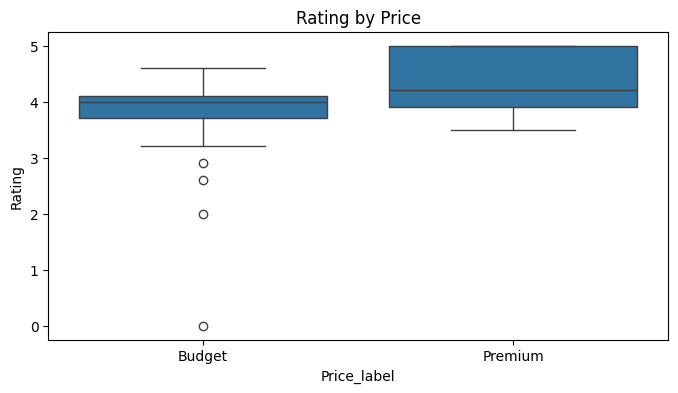

In [20]:
prices = [0, 80000, 150000]
price_label = ['Budget', 'Premium']
df['Price_label'] = pd.cut(df['Price'], bins=prices, labels=price_label)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 4))
sns.boxplot(x='Price_label', y='Rating', data=df)
plt.title('Rating by Price')
plt.show()

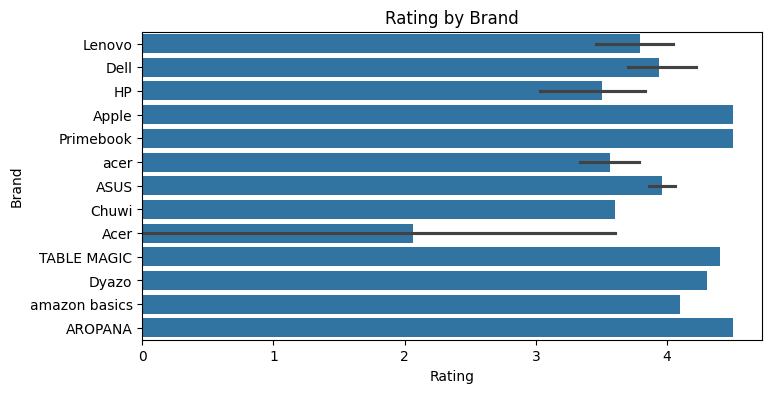

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Rating', y='Brand', data=df)
plt.title('Rating by Brand')
plt.show()

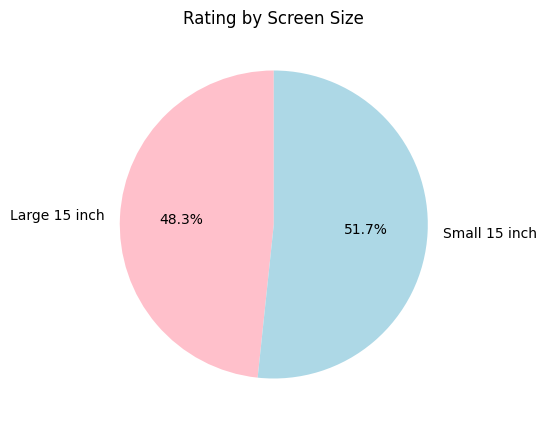

In [31]:
df['Screen Size Group'] = np.where(df['Screen Size'] > 15, 'Large 15 inch', 'Small 15 inch')
screen_size = df.groupby('Screen Size Group')['Rating'].mean()

plt.figure(figsize=(8, 5))
plt.pie(screen_size, labels=screen_size.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Rating by Screen Size')
plt.show()

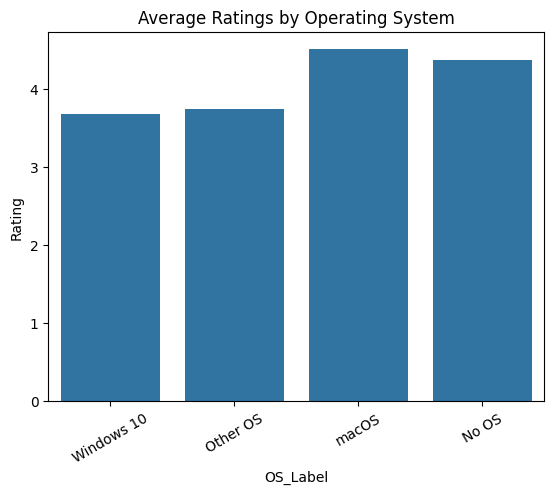

In [35]:
df['OS_Label'] = df['Operating System'].map({
    11: "Windows 11",
    10: "Windows 10",
    2: "macOS",
    1: "Other OS"
})

# Simple barplot
sns.barplot(x='OS_Label', y='Rating', data=df, errorbar=None)
plt.title("Average Ratings by Operating System")
plt.xticks(rotation=30)
plt.show()

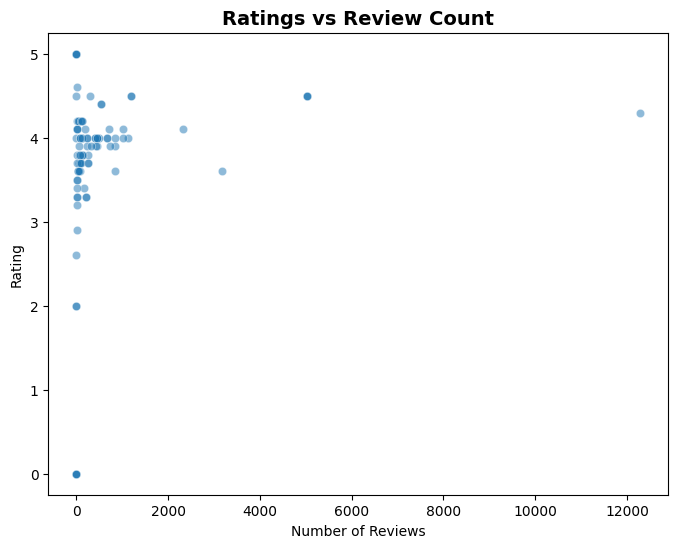

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Review Count', y='Rating', data=df, alpha=0.5)

plt.title("Ratings vs Review Count", fontsize=14, weight='bold')
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

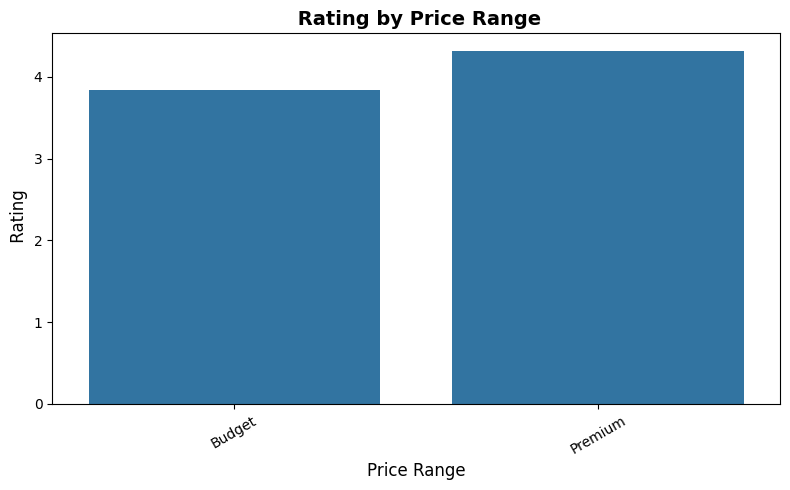

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_label', y='Rating', data=df, errorbar=None )

plt.title(" Rating by Price Range", fontsize=14, weight='bold')
plt.xlabel("Price Range", fontsize=12)
plt.ylabel(" Rating", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

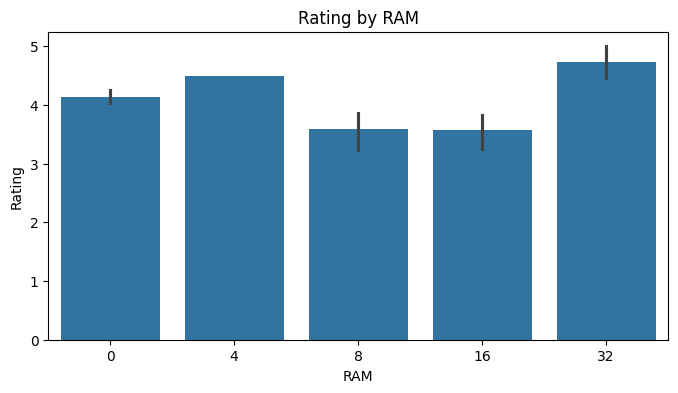

In [46]:

plt.figure(figsize=(8, 4))
sns.barplot(x='RAM', y='Rating', data=df)
plt.title('Rating by RAM')
plt.show()


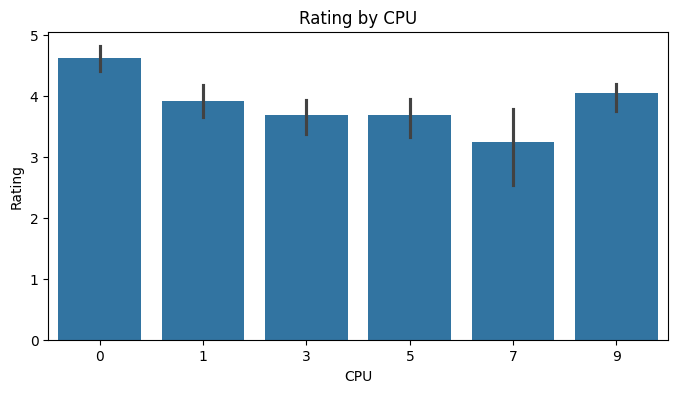

In [27]:
plt.figure(figsize=(8, 4))
sns.barplot(x='CPU', y='Rating', data=df)
plt.title('Rating by CPU')
plt.show()